<a href="https://colab.research.google.com/github/Rion-user/Welcome/blob/master/%EC%9E%90%EB%A3%8C%EC%A1%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 자료조사

링크

[2023 인공지능 학습용 데이터 품질관리 가이드라인 및 구축 안내서 v3.0](https://www.nia.or.kr/site/nia_kor/ex/bbs/View.do?cbIdx=26537&bcIdx=25370&parentSeq=25370)

[An Introduction to Machine Translation Quality Estimation](https://phrase.com/blog/posts/mt-quality-estimation/)



keywords
* TER(번역 편집 거리)
* 기계번역 품질 예측 태스크
* 기계번역 품질 예측 모델의 평가는 Matthews correlation coefficient (MCC)로 측정하며, f1 score도 함께 평가 지표로 제시됨


* 파파고 빨간펜
* mqm 지표

## 파파고 빨간펜 선생님
> 번역모델 평가에는 크게 2가지 방식이 존재
1. 전문가 평가 : 기계번역 모델간 품질을 가장 정확히 비교 및 평가하는 방법
  - 시간 및 비용 측면에서 비쌈
  - 평가 데이터 구축 필요함
  - 현 ML 산업은 매우 fast-pace, 서비스 모델 개선/업데이트 인터벌이 짧음
2. 자동 번역 평가
  - 전문가 평가 대비 적은 비용과 시간 투입
  - BLEU를 일반적으로 많이 쓰지만 정밀한(semantic) 평가 불가

WMT 2020~2022 QE Shared Task 참여하며 자체 기술 고도화
> QE Task는 목적에 따라 QE 모델의 예측값 형태도 다양함

파파고는 똑똑해 <-> Papago is cute라는 세트가 존재할 때
* Sentence-level QE : 0.3
* Word-level QE : papago = Good, is = Good, cute = Bad
* MQM word-level QE : cute = error_type : mistranslation, error_severity : major

## 파파고 QE 모델 기술

### 1. 인공 학습데이터 생성을 통해 데이터 양 / 언어쌍을 보강
* 공개된 QE 모델을 사용하여 (원문, 번역문) 문장쌍에 대한 인공 레이블을 생성
* 인공데이터를 학습에 추가 사용시, 모든 언어쌍에서 성능 향상

### 2. Parallel Mining
* Monolingual corpus를 NMT에 활용하는 방법
* 모델 기반 : BART, MASS pretrain -> NMT fine-tune
* 데이터 증강 기반 : Back-translation
* 데이터 증강 기반 : Parallel Mining
  * 대량의 한국어, 영어 말뭉치가 존재할 때 한-영 alignment를 탐색

## WMT QE Shared TASK 2023

> Goals

In addition to generally advancing the state of the art in quality estimation, our specific goals are:

* to extend the available public benchmark datasets with medium- and low-resource languages;
* to investigate the potential of fine-graned quality estimation;
to investigate new multilingual and language independent approaches esp. for zero-shot approaches; and
* to study the robustness of QE approaches

Specifically based on the provided MQM annotations we compute the MQM error by summing penalties for each error category:

* +1 point for minor errors
* +5 points for major errors
* +10 points for critical errors

To align with DA annotations we subtract the summed penalties from **100 (perfect score)** and we then divide by the sentence length (computed as number of words). We finally standardize the scores for each language pair/annotator.

> Evaluation

Word-level : We will use **MCC** (Matthews correlation coefficient) as a primary metric and **F1-score** as secondary.

> Submission Format

(완벽하게 매칭하지는 않음 참고사항)
* **LANGUAGE PAIR** is the ID (e.g. en-de) of the language pair of the plain text translation file you are scoring. Follow the LP naming convention provided in the test set.
* **METHOD NAME** is the name of your quality estimation method.
* **SEGMENT NUMBER** is the line number of the plain text translation file you are scoring (starting at 0).
* **TARGET SENTENCE** is the target sentence based on which the error span indices were extracted. You should use exactly the target sentence as provided by the test set to ensure alignment with the gold labels.
* **ERROR START INDICES** the start indices (character level) of every exrror span extracted. For multiple error spans separate indices by a whitespace. For no errors output -1.
* **ERROR END INDICES** the end indices (character level) of every exrror span extracted. For multiple error spans separate indices by a whitespace. For no errors output -1.
* **ERROR TYPES** indication of minor or major error for each detected error span. The number of indices should match the number of errors. If there is no error span in a segment indicate with no-error.

> Description of Error

For a description of error severtities and MQM annotations you can also read:

* Experts, Errors, and Context: A Large-Scale Study of Human Evaluation for Machine Translation
* Results of the WMT21 Metrics Shared Task

> Useful Software

Here are some open source software for QE that might be useful for participants: (모델 학습 Framework라 도움은 안될 듯)

* OpenKiwi
* COMET-QE
* TransQuest
* DeepQuest

## Experts, Errors, and Context: A Large-Scale Study of Human Evaluation for Machine Translation

[Experts, Errors, and Context: A Large-Scale Study of Human Evaluation for Machine Translation](https://aclanthology.org/2021.tacl-1.87) (Freitag et al., TACL 2021)

[유튜브 보기](https://www.youtube.com/watch?reload=9&app=desktop&v=EBTaGnggVR0)

### Abstract

field still lacks a commonlyaccepted standard procedure

toward this goal, we propose an evaluation methodology grounded in explicit error analysis, based on the Multidimensional Quality Metrics (MQM) framework.

### Introduction

Like many natural language generation tasks, machine translation (MT) is difficult to evaluate because the set of correct answers for each input is
large and usually unknown.

Yet even human evaluation is problematic

there is a risk that the signal will become lost in rater noise or bias.

This paper aims to contribute to the evolution of
standard practices for human evaluation of highquality MT.

Our key insight is that any scoring or ranking of translations is implicitly based on an identification of errors and other imperfections.

MQM is a generic framework that provides a
hierarchy of translation errors which can be tailored to specific applications. We identified a hierarchy appropriate for broad-coverage MT, and
annotated outputs from 10 top-performing "systems" (including human references)

Our main contributions are:

* A proposal for a standard MQM scoring
scheme appropriate for broad-coverage MT.
* Demonstration that automatic metrics based on pre-trained embeddings can outperform human crowd workers.
* Characterization of current error types in HT and MT, identifying specific MT weaknesses

### MQM
Table 12. MQM Guidelines

Since we are ultimately interested in scoring
segments, we require a weighting on error types.
We fixed the weight on Minor errors at 1, and explored a range of Major weights from 1 to 10 (the
Major weight recommended in the MQM standard). For each weight combination we examined
the stability of system ranking using a resampling
technique. We found that a Major weight of 5 gave
the best balance between stability and ability to
discriminate among systems.

These weights apply to all error categories with
two exceptions. We assigned a weight of 0.1 to
Minor Fluency/Punctuation errors to reflect their
mostly non-linguistic nature. Decisions like the
style of quotation mark to use or the spacing
around punctuation affect the appearance of a text
but do not change its meaning. Unlike other kinds
of Minor errors, these are easy to correct algorithmically, so we assign a low weight to ensure that
their main role is to distinguish between systems
that are equivalent in other respects. Major Fluency/Punctuation errors, which render a text ungrammatical or change its meaning (eg, eliding
the comma in “Let’s eat, grandma”), have standard weighting. The second exception is the singleton Non-translation category, with a weight of
25, equivalent to five Major errors.
Table 1 summarizes our weighting scheme, in
which segment-level scores can range from 0 (perfect) to 25 (worst). The final segment-level score
is an average over scores from all annotators.

| a | b | c |
|---|---|---|
| Major  | Non-translation  | 25  |
| Major  | all others  |  5 |
| Minor  | Fluency/Punctuation  | 0.1  |
| Minor  | all others | 1  |
| Netural  | all  | 0  |

Table 1: MQM error weighting

실험은 유튜브 참조

### Conclusion

As part of this work, we proposed a standard
MQM scoring scheme that is appropriate for high quality MT.

Our study shows that crowd-worker human
evaluations (as conducted by WMT) have low
correlation with MQM, and the resulting system level rankings are quite different.

MQM labels acquired with professional translators show a large
gap between the quality of human and machine
generated translations. This demonstrates that
MT is still far from human parity. Furthermore,
we characterize the current error types in human
and machine translations, highlighting which error
types are responsible for the difference between
the two.

 We hope that researchers will use this
as motivation to establish more error-type specific
research directions.

### 추가
Many MQM schemes include an
additional “Critical” severity which is worse than
Major, but we dropped this because its definition
is often context-specific, capturing errors that are
disproportionately harmful for a particular application

We felt that for broad coverage MT the
distinction between Major and Critical was likely
to be highly subjective, while Major errors (actual
errors) would be easier to distinguish from Minor
ones (imperfections). Neutral severity allows annotators to express subjective opinions about the
translation without affecting its rating

Annotator instructions are shown in Table 12.
We kept these minimal because our raters were
professionals with previous experience in assessing translation quality, including with MQM.
There are many subtle issues that arise in error annotation, such as the correct way to translate units
(eg, should 1 inch be translated as 1 Zoll, 1cm,
or 2.54cm?), but we resisted the temptation to establish an extensive list of context-specific guidelines, relying instead on the judgment of our annotators. In order to temper the effect of long segments, we imposed a maximum of five errors per
segment. For segments with more errors, we asked
raters to identify only the five most severe. Thus
we do not distinguish between segments containing five or more than five Major errors, although
we do distinguish between segments with many
identifiable errors and those that are categorized
as entirely Non-translation. To focus our raters
on careful error identification, and to provide potentially useful information for further studies, we
had them highlight error spans in the text, following the conventions laid out in Table 12.

Scoring
Since we are ultimately interested in deriving
scores for sentences, we require a weighting on
error categories and severities. We set the weight
on Minor errors to 1, and explored a range of Major error weights from 1 to 10 (the Major weight
recommended in the MQM standard). For each
weight combination we examined the stability of
system ranking using a resampling technique. We
found that a Major weight of 5 gave the best balance of stability and ability to discriminate among
systems.
These weights apply to all error categories except Fluency/Punctuation and Nontranslation. We assigned a weight of 0.1 for
Fluency/Punctuation to reflect its mostly nonlinguistic character. Decisions like the kind of
quotation mark to use or the spacing between
words and punctuation affect the appearance of a
text but do not change its meaning. Unlike other
kinds of minor errors, these are easy to correct
algorithmically, so we assign them a low weight
to ensure that their main role is to distinguish
between systems that are equivalent in other
respects. Our decision is supported by evidence
from professional translators, who tend to treat
minor punctuation errors as insignificant for the
purpose of scoring, even when they are required to
annotate them within the MQM framework. Note
that this category does not include punctuation
errors that render a text ungrammatical or change
its meaning (eg, eliding the comma in “Let’s eat,
grandma”), which have the same weight as other
Major errors. Source errors are ignored in our
current study but give us the ability to discard
badly garbled source sentences, which might be
prevalent in certain genres. The singleton Nontranslation category has a weight of 25, equivalent
to five Major errors, the worst segment-level score
possible in our annotation scheme.
Our current weighting ignores the text span of
errors, as this provides little information relevant
to scoring once severity and category are taken
into account.
Table 1 summarizes our weighting scheme. The
score of a segment is the sum of all errors it contains, averaged over all annotators, and ranges
from 0 (perfect) to 25 (maximally bad). Segment scores are averaged to provide document and system-level scores.




MQM Framework

## Results of the WMT21 Metrics Shared Task: Evaluating Metrics with Expert-based Human Evaluations on TED and News Domain

[Results of the WMT21 Metrics Shared Task: Evaluating Metrics with Expert-based Human Evaluations on TED and News Domain](https://aclanthology.org/2021.wmt-1.73) (Freitag et al., WMT 2021)

기존 WMT의 경우 new data 기준 해당 저자는 metrics의 generalize
and perform well across domains를 판단하기 위해 Ted talks 데이터를 추가

### Ted Talks Test Suite

A long standing question about automated MT evaluation metrics has been whether metrics generalize and perform well across domains

The TED domain is quite different from the news domain, particularly in its more informal and disfluent language style, yet it covers a wide variety
of topics and vocabularies.

As we will see, the quality performance
of these systems and their relative rankings can be
quite different depending on the language pair, as
these were not trained to yield the highest performance on the news or TED domain

The quality of the underlying human ratings is critical and recent findings (Freitag et al., 2021) have shown that crowd-sourced human ratings are not reliable for high quality MT output.

To temper the effect of long segments, we imposed a maximum of five errors per segment, instructing raters to choose the five most severe errors for segments containing more errors.

->  구글이랑 같은거 썼다. weighting도 같음.

Annotation for English→Russian was performed
by Unbabel who used a single professional native
language annotator with several years of translation
error experience based on variations of the MQM
framework (Lommel et al., 2014).

The Unbabel
severity options differ slightly from that of Google
in that we also specify a ‘critical’ error severity and
do not specify a ‘neutral’ category.

-> 근데 구글이랑 좀 다르게 함.

Additionally,
in the Unbabel typology, all error categories are
weighted equally within each severity level.

MQM scores at a segment level are calculated
by summing the number of errors in the segment
in each severity and applying a severity weight as
described in Table 3. In contrast to the Google
scheme, Unbabel does not impose a limit on the
number of errors in a segment.

-> 계산 방식도 좀 다름 (Table 3 참고)

### Google vs. Unbabel MQM

Given that annotations were undertaken for
English→Russian using a different setup and
MQM scheme than those for English→German
and English→Chinese we sought to provide some
insight into the compatibility of the two schemes
by repeating the annotation for English→German
using Unbabel’s scheme and annotator pool

We note that the Google annotators left 59.5% of
the sample untouched (i.e. error free), whereas the
Unbabel annotator left only 46.9% untouched. It
appears that the Unbabel annotator was on average
more aggressive in their annotation which might
partially explain low levels of agreement.



https://www.statmt.org/wmt22/pdf/2022.wmt-1.3.pdf
https://aclanthology.org/2022.wmt-1.57.pdf
https://www.researchgate.net/figure/MQM-core-issue-types-used-for-the-word-level-annotation-task_fig1_273259476
https://arxiv.org/pdf/2308.07286.pdf
https://www.semanticscholar.org/paper/Word-Level-Quality-Estimation-for-Korean-English-Eo-Park/ec240fd52b5bd7338349a9d8bd147ab9aa341ba5
https://www.taus.net/resources/blog/quality-estimation-for-machine-translation
https://www.semanticscholar.org/paper/PATQUEST%3A-Papago-Translation-Quality-Estimation-Baek-Kim/a7f0a1baf1a962137629476156bb361136d00a3e
https://choice-life.tistory.com/82
https://www.w3.org/community/mqmcg/2018/10/04/draft-2018-10-04/
https://sites.miis.edu/runyul/2018/03/04/translation-quality-assessment-mqm-multidimensional-quality-metrics/


# 과제 1

## A Survey on Audio Diffusion Models: Text To Speech Synthesis and Enhancement in Generative AI

https://arxiv.org/abs/2303.13336

### Introduction

the text-to-speech
and speech enhancement task are two main active tasks, which **generates a speech from a given text and enhances**
the quality of an existing speech, respectively.

The development of text-to-speech task can be roughly divided into
**three stages** [112]: **early works** (e.g., formant synthesis [40, 41, 95] and concatenative synthesis [29, 69, 75]), **statistical
parametric speech synthesis (SPSS)-based methods** [115, 116, 133], and **neural network-based stage**

Speech enhancement [74] is another active research field in
speech area, which generates speech with a speech signal as input.

this work conducts a survey on audio diffusion models

While [111] reviews text-to-speech works, it mainly highlights the digital signal processing
components. Other works [73, 74, 112] review speech synthesis based on deep learning, which give us an understanding
of the development of neural text-to-speech or speech enhancement.

### Background

In essence, an audio waveform
is a mixture of frequencies [14, 120], and therefore, audio analysis often starts with transforming the audio from its raw
waveform in the time domain to the spectrogram in the time-frequency domain. This is achieved by segmenting the
audio into windows, for which a short-time Fourier Transform (STFT) [64] calculate its magnitude for each frequency.

The STFT is repeated for every window along the time direction, resulting in a map of complex values with two
dimensions: X-axis representing frame (time) and Y-axis representing frequency.

Since human are not sensitive to the frequency
equally, a mel-scale is often adopted to transform the spectrogram (magnitude map) into Mel-spectrogram

Mel은 달팽이관에서 모티브를 받았으며, 달팽이관은 특수한 성질이 있다.
주파수가 낮은 대역에서는 주파수의 변화를 잘 감지하는데, 주파수가 높은 대역에서는 주파수의 변화를 잘 감지하지 못한다는 것이다.

달팽이관의 구조로 살펴보면, 달팽이관에서 저주파 대역을 감지하는 부분은 굵지만
고주파 대역을 감지하는 부분으로 갈수록 얇아진다
그렇다면, 특징벡터로 그냥 주파수를 쓰기 보다는 이러한 달팽이관의 특성에 맞춰서 특징을 뽑아주는 것이  더욱 효과적인 피쳐를 뽑는 방법일 것이다.
그래서 위와 같이 사람 달팽이관 특성을 고려한 값을 Mel-scale이라고 한다.

### Overview of the text-to-speech development

From three-stage to two-stage framework. The development of text-to-speech has undergone through a shift
from a three-stage framework to a two-stage framework, as shown in Figure 1. Before applying neural networks

statistical parametric speech synthesis (SPSS) was a popular method [115, 116, 132, 133, 137] consisting of three
stages. As shown in Figure 1 (a), the text input is first converted to linguistic features, then acoustic features, and
to the waveform in the last stage. Common acoustic features include mel-cepstral coefficients [18], Mel-generalized
coefficients [114], F0 [34] and band aperiodicity [33]. Neural networks have brought a paradigm shift from three stages
(Figure 1 (a)) to two stages (Figure 1 (b) and Figure 1 (c)). One branch of two-stage framework makes a deep vocoder
directly generates waveform from linguistic features (Figure 1 (b)), such as WaveNet [118], Parallel Wavenet [76],
DeepVoice 1 [2] DeepVoice 2 [20], HiFi-GAN [4]. **Currently, another two-stage framework is more dominant** as shown
in Figure 1 (c), which directly generates Mel-Spectrogram form of acoustic features from text with a single deep acoustic
model, including DeepVoice 3 [83], TransformerTTS [54], Fast Speech 1 [88] and Speech 2 [87].

Overview of diffusion-based methods. Most recent text-to-speech works on diffusion model follow the two-stage
framework in Figure 1 (c), which first generate acoustic features with a acoustic models, and then output waveform with
a vocoder. Another branch of work attempts to solve the text-to-speech task in an end-to-end manner.

### Acoustic model
Acoustic model that transforms a text to acoustic features is a core component in the the task of text to speech. A
summary of representative work that apply diffusion model to acoustic model is shown in Table 2.

In speech synthesis systems, an acoustic model converts the text into acoustic features (e.g., Mel-spectrogram).
Diff-TTS [31] is the first work that applies DDPM to el-spectrogram generation.

Acceleration with knowledge distillation. According to ProDif

Acceleration with Denoising Diffusion GANs. DiffGAN-TTS

Adaptive modeling for multi-speaker setting. Grad-TTS

Acoustic models with discrete latent space. Diffsound

### Vocoder

Neural vocoders generate waveform based on acoustic feature, e.g., Mel-spectrogram. In earlier researches on vocoders
until 2020, autoregressive models have been popular in audio generation for their high-quality output samples but
suffer from low inference speed. Although non-autoregressive methods improve the inference speed significantly by
reducing sequential steps, there is still an audio quality gap between non-autoregressive and autoregressive methods.

WaveGrad [7] is a pioneering work combing score matching and diffusion models by estimating the gradient of
the data log-density, which bridges the audio quality gap between non-autoregressive and autoregressive methods.

Another work
DiffWave [45] is the first model showing a high versatility of waveform generation applications based on diffusion
models. In the vocoder task, DiffWave [45] is conditioned on mel-spectrogram, and achieves comparable speech
quality to the strong autoregressive methods. DiffWave [45] can also produce realistic voices and consistent word-level
pronunciation in unconditional and class-conditional settings

With a shared noise schedule for training and sampling, DDPM [24] requires thousands of sampling iterations
for high-quality generation [48]. This property inspires investigations to speed up DDPM [24] by improving the
noise schedule.

Schedule prediction by additional networks. In the vocoder task,
BDDM [48] can generates indistinguishable samples from human speech with only seven steps, 143x and 28.6x faster
than WaveGrad [7] and DiffWave [45], respectively.

Efficient inference by joint training. To reduce the inference iterations while maintaining the generation quality,
InferGrad [9] proposes to incorporate the inference process into training with an additional loss.

Improvement with noise prior. DDGM [70] improves the quality of generated
audio than WaveGrad [7]. Quality improvement is also observed in the image generation area

Another work [50] points
out that the Gaussian noise prior may be insufficient to represent all modes of the samples (e.g., the different voiced andunvoiced segments), leading to a discrepancy between the real data distribution and the choice of prior and thus the
training inefficiency. Thus, PriorGrad [50] proposes to apply an adaptive prior from the data statistics for the efficiency
improvement of the conditional diffusion model for speech analysis.

Other improvements. ItôWave [125] is the first to propose a vocoder based on linear Itô SDE. Based on Melspectrogram, ItôWave [125] achieves higher MOS with 95% confidence than WaveGrad [7] and DiffWave [45]. SpecGrad [44] proposes to adopt the spectral envelope of diffusion noise to the conditional log-mel spectrum, which improves
the sound quality especially for the high-quality bands.

### End-to-end frameworks

Instead of treating acoustic modeling and vocoder modeling as independent processes, a branch of work evolves from
partially end-to-end methods to fully end-to-end methods gradually.

Resembling the two-stage frameworks, partially
end-to-end methods [82, 107] also adopt two models as acoustic model and vocoder, but differentiates by training the
two models in a joint manner

By contrast, (fully) end-to-end frameworks adopt a single model to generate waveform
from text without acoustic features as explicit representation.

A line of fully end-to-end work adopts an adversarial
decoder (or GAN), including FastSpeech 2 [87], EATS [15] and EFTS-Wav [65]. Most end-to-end methods still rely on
generating mel-spectrogram for text-speech alignment, and a spectrogram-free flow-based method is investigated in
Wave-Tacotron [123] by simply maximizing likelihood. A limitation of Wave-Tacotron [123] is that the decoder remains
autoregressive making it at a disadvantage compared with non-autoregressive counterparts.

Pioneering works. In contrast to WaveGrad [7] converting Mel-spectrogram to waveform, WaveGrad 2 [8] adopts an
end-to-end manner that takes a phoneme sequence as input and generates the audio directly

Generation of fullband audios. While previous work focusing on the generation of band-limited audios due
to model constraints, DAG [79] adopts an end-to-end manner to generate full-band audios directly

Model based on Itô SDE. Inspired by ItôWave [125], Itôn [99] proposes an end-to-end model for speech synthesis
based on Itô SDE. Apart from the encoder-decoder architecture, Itôn [99] introduces a dual-denoiser structure for the generation of mel-spectrogram and waveform, respectively. Moreover, Itôn [99] adopts a two-stage training strategy
that trains the encoder and Mel denoiser in the first stage, and the wave denoiser in the second stage.

### SPEECH ENHANCEMENT

Apart from text-to-speech generation, diffusion models have also been widely used in improving the quality of
existing degraded audio.

Numerous factors can cause the degradation of audio quality and we divide them into two
classes according to the restoration type. The first branch of methods **removes perturbations** in the original clean audio,
e.g., noise and reverb. The second branch **restores missing parts or adds the desired part**, e.g., audio super-resolution.

Numerous deep speech enhancement methods have been investigated and they can be categorized into two classes. A
discriminative method minimizes the difference between enhanced and clean speech [13, 16, 17, 42], while generative
models are optimized by estimating the distribution of clean signals [51, 80, 86, 106, 108]. Despite a superior result
regarding objective metrics, the discriminative class often suffers from sounding unnatural compared with the generative
class. Diffusion model falling into the generative class is a promising method for bridging its gap with the discriminative
class.

### Enhancement by removing

Two-stage refinement in speech enhancement. Research on speech enhancement has achieved significant
improvement in terms of signal-to-noise (SNR) ratio but sometimes degrades the speech quality (e.g., naturalness),
leading to the degradation of downstream applications. To remove the distortions of speech enhancement outputs,
Refiner [93] applies a diffusion model pretrained on clean speech data to detect the degraded part, and then replaces them
with newly generated clean ones in the manner of denoising diffusion restoration models(DDRM) [35]. Experimental
results show that Refiner [93] is versatile since it improves speech quality with regard to various speech enhancement
methods. Moreover, the Refiner [93] can also be integrated into the speech enhancement model for joint optimization
in the future.

### Enhancement by adding

Audio super-resolution [46, 56], also widely known as upsampling [84] or bandwidth extension [46], aims to generate
audio of a high sampling rate from that of a low sampling rate via extending its bandwidth

Improved sampling method. Diffusion-based audio super-resolution is commonly conducted by conditioning the
denoising network on low-resolution audio. [134] further improves the audio quality by injecting the low-resolution
audio into the sampling process as a condition if the downsampling schedule is known

Improved model architecture. [141] improves the speech quality caused by deterministic mathematical degradation, e.g., compression, clipping and downsampling.

### Miscallenous audio tasks

Voice conversion. Voice Conversion edits the source speakers to adapt to the target speaker by changing speech
signal features. Traditional techniques include vector quantization [1, 100], hidden Markov models [36, 113], and
Gausian mixture models [109, 121]. However, these methods only focus on specific parts of spectrum rather than the
entire spectrum, resulting in poor speech quality. To solve these problems, [47, 66, 81, 110? ] adopt neural networks
which cover the entire spectrum, and DiffSVC [59] is a pioneering work that leveraging diffusion models on voice
conversion. Specifically, DiffSVC [59] is developed for singing voice conversion (SVC), which first transforms the
phonetic posteriorgrams (PPGs) to spectral features, and then transforms them into waveforms by a trained neural
vocoder. This method can get the target speech by any other speech as input (i.e., any-to-one SVC).






### TTS 정리

https://music-audio-ai.tistory.com/44

네, 맞습니다. 한국어는 주로 음절 간의 연결에서 발음 변이가 발생합니다. 한국어의 음절 구조와 그 안에서 일어나는 연쇄 반응 때문에 음절과 음절 사이에서 다양한 발음 변이가 일어납니다.

예를 들어:

1. **종성 연음**: 단어나 음절의 마지막 자음(받침)이 다음 음절의 모음과 연결되어 발음됩니다.
   - 예: "있어"는 "이써"로 발음됩니다.

2. **자음 동화**: 한 음절의 자음이 그 다음 음절의 자음에 영향을 받아 발음이 변합니다.
   - 예: "입맛"은 "이맛"처럼 발음됩니다.

3. **자음 연화 (경음화)**: 발음하기 쉽게 하기 위해 무거운 발음이 가벼운 발음으로 바뀝니다.
   - 예: '같이'는 '가치'로 발음됩니다. ('ㄷ'이 'ㅊ'으로 발음 변이)

4. **사잇소리 첨가**: 음절과 음절 사이에서 발음이 연결되면서 자음의 반복으로 인한 소리의 첨가가 발생합니다.
   - 예: "학교"에서 'ㄱ' 사운드가 두 번 들립니다.

따라서 한국어를 이해하거나 학습할 때는 단순히 단어나 문장의 발음만이 아니라 음절 간의 연결과 그에 따른 발음 변이를 중점적으로 주목해야 합니다.

나무위키 한국어 발음 https://namu.wiki/w/%ED%95%9C%EA%B5%AD%EC%96%B4/%EC%9D%8C%EC%9A%B4%20%EB%B3%80%EB%8F%99

콜센터

https://www.aitimes.com/news/articleView.html?idxno=147858
https://www.etnews.com/20230821000113
https://m.khan.co.kr/economy/economy-general/article/202303081655001#c2b
https://www.google.com/search?q=%EA%B5%AD%EB%AF%BC%EC%9D%80%ED%96%89+%EC%BD%9C%EC%84%BC%ED%84%B0&sca_esv=566064718&biw=2560&bih=1291&ei=2OIGZZ2OHMjl2roPr9aCoAU&ved=0ahUKEwid2o2XxbGBAxXIslYBHS-rAFQQ4dUDCBA&uact=5&oq=%EA%B5%AD%EB%AF%BC%EC%9D%80%ED%96%89+%EC%BD%9C%EC%84%BC%ED%84%B0&gs_lp=Egxnd3Mtd2l6LXNlcnAiFuq1reuvvOydgO2WiSDsvZzshLzthLAyDBAAGIoFGEMYRhj7ATIHEAAYigUYQzIFEAAYgAQyBBAAGB4yBhAAGB4YDzIGEAAYHhgPMgQQABgeMgYQABgeGA9In7kBULcjWIC4AXAFeACQAQGYAZQBoAH2F6oBBDAuMjW4AQPIAQD4AQHCAgoQABhHGNYEGLADwgIGEAAYBRgewgIGEAAYCBgewgIFECEYoAHCAgsQABiABBixAxiDAcICCBAAGIAEGLEDwgIGEAAYAxgKwgIEEAAYA8ICDhAuGIAEGLEDGMcBGNEDwgILEC4YgAQYxwEY0QPCAg0QLhiKBRjHARjRAxhDwgILEC4YgAQYsQMYgwHCAgcQLhiKBRhDwgIOEC4YxwEYsQMY0QMYgATCAh0QLhiABBixAxjHARjRAxiXBRjcBBjeBBjgBNgBAeIDBBgAIEGIBgGQBgq6BgYIARABGBQ&sclient=gws-wiz-serp#vhid=HYy7sLkbE74NmM&vssid=l&ip=1

동음이의어, 동철이음이의어

https://namu.wiki/w/%EB%8F%99%EC%9D%8C%EC%9D%B4%EC%9D%98%EC%96%B4%C2%B7%EB%8B%A4%EC%9D%98%EC%96%B4?from=%EB%8B%A4%EC%9D%98%EC%96%B4

https://namu.wiki/w/%EB%8F%99%EC%9D%8C%EC%9D%B4%EC%9D%98%EC%96%B4%C2%B7%EB%8B%A4%EC%9D%98%EC%96%B4?from=%EB%8B%A4%EC%9D%98%EC%96%B4

https://www.hani.co.kr/arti/economy/finance/1093887.html

■ 은행들도 시큰둥…‘경쟁 촉진’ 미지수
금융위가 기대하는 경쟁 촉진과 금리 하락 효과도 얼마나 있을지 불분명하다는 평가다.
일단 시범운영 기간에는 금융회사별로 대환대출 한도가 정해져 있어 경쟁에 나설 유인이 적다.
가령 은행은 최대 4천억원으로, 저축은행은 3천억원으로 제한된다.
시중은행의 경우 이는 대체로 지난해 신용대출 신규취급액의 10% 안팎에 그친다.
한 시중은행 관계자는 “플랫폼을 통해 유입된 고객은 다른 부수적 거래로 이어질 가능성이 낮다는 점에서도 은행이 적극적으로 나설 유인이 적다”고 말했다.
향후 금융당국이 한도를 크게 늘려줄 가능성도 낮다.
대환대출 규모가 지나치게 커지면 일부 취약한 금융회사들의 대출자산이 많이 빠져나가면서 금융시스템이 불안해질 가능성도 있기 때문이다.
당장 시장에서는 대환대출 플랫폼을 통해 고객을 뺏긴 일부 저축은행들의 건전성이 악화할 수 있다는 전망이 제기되고 있다.
이들 저축은행의 경우 건전성을 감안하면 대환대출 플랫폼에서 대출금리 경쟁에 적극 나서기 어렵다는 점에서도 우려가 나온다.
경쟁 촉진으로 인한 금리 하락 효과가 나타난다고 해도 일부 상쇄될 공산이 크다.
플랫폼 수수료 등 금융회사가 추가로 부담하는 비용이 소비자에게 전가될 수 있는 탓이다.
플랫폼 기업은 대출금액의 일정 비율을 금융회사에 수수료로 물린다.
플랫폼 기업 입장에서는 고객이 대출금리 비교 조회를 할 때마다 금융결제원에 내야 하는 비용까지 감안하면 수수료를 마냥 낮추기 어려운 상황이다.

■ 우리, 하나 전략

우리은행은 타금융사 대출을 우리은행 대출로 대환하는 경우 우수 신용등급 고객에게 최초 약정기간 대출금리 0.5%p 추가 우대 혜택을 준다.
하나은행은 대환대출 서비스 전용 상품인 '하나원큐신용대출 갈아타기'의 금리 하단을 이날 기준 4.607%로 일반 신용대출 금리 하단(5.307%)보다 0.7%p 낮게 책정했다.



1) 자연스러운 TTS 구현을 위한 ㄴ 첨가 처리 방안

ㄴ 첨가 발음이 수의적 음운현상
TTS 발화의 ㄴ 첨가발음이 비체계적으로 실현되고 있을 뿐만 아니라,
표준 발음에 얽매여 현실 발음을 적절히 반영하지 못하고 있다는 점을 지적하였다.

글로벌 기업의 서비스로는 구글의 구글 번역기(Google Translator, 이하 GT),
국내 기업의 서비스로는 네이버의 네이버 파파고(Naver Papago, 이하 NP)

두 형태소가 결합되는 경계를 중심으로 자음과 ㅣ계열 모음이 연접하는 경우(이하, ‘ㄴ 첨가 환경’)에
형태소 경계에 ㄴ이 첨가되는 현상을 ㄴ 첨가라고 한다.

구체적인 실현 양상을 살펴보면 유사한 ㄴ 첨가 환경일지라도 반드시 ㄴ 첨가가 실현되는 경우와
절대로 ㄴ 첨가가 나타나지 않는 경우로 엄격하게 구분하기 어려운 사례가 있기 때문에
ㄴ 첨가는 단순히 선택적 음운현상이 아니라 수의적 음운현상으로 볼 수밖에 없다

ㄴ 첨가의 발음 실태는 다수의 연구에서 보고된 바 있다.10) 여기서는 김선철(2003), 국경아 外(2005)를 중심으로
ㄴ 첨가의 발음 실태를 확인해보기로 한다.11)
우선, 김선철(2003)에서는 62개 단어를 중심으로 ㄴ 첨가 발음의 실태를 조사하였다.
62개 단어는 고유어와 한자어로 구분하고 각각은 합성어와 파생어가 모두 포함되도록 구성하였다.
실제 조사는 피조사자의 실제 발음을 녹음하여 ㄴ 첨가 실현 여부를 확인하는 방식으로 진행

발음 실태 조사 결과를 보면 실제 발음은 표준 발음과 차이가있다는 것을 알 수 있다.

국경아 外(2005)에서는 ㄴ 첨가 환경에 놓인 183개 단어에 대해 설문조사로 ㄴ 첨가 발음을 선호하는 정도를 조사하였다.

높음(60% 초과)118단어

표준 발음인 단어들에 대해서 ㄴ을 첨가한 발음이 선호되고있는 면 등은
표준 발음과 현실 발음에 괴리가 존재하고 있다는 것을 보여주는 증거이다.

GT와 NP의 TTS 발화 자료를 살펴보기로 한다. 이는 TTS의 ㄴ 첨가 발음의 현황과 특성을 살펴보기 위함이다.
TTS 발화를 살펴보기 위해 국경아 外(2005)의 단어 목록을 적극 활용하였다.
182개 단어의 TTS 발화를 살펴보았다

GT의 발음을 살펴보면, ㄴ 첨가 형태로 발음된 것이 81건, ㄴ 미첨가 형태로 발음된 것이 82건,
그리고 기타 발음이 19건으로 나타난다. ㄴ첨가와 ㄴ 미첨가의 비율이 비슷하게 나타나는 것이 특징이다

NP의 발음을 살펴보면, ㄴ 첨가 형태로 발음된 것이 118건, ㄴ 미첨가 형태로 발음된 것이 56건, 기타 발음이 8건으로 나타난다

GT와 NP의 TTS
발음이 비체계적이라는 점을 지적할 수 있다. GT와 NP 모두 표준 발음에
부합되지 않은 발음이 상당히 출현하고 있지만, 그렇다고 해서 GT와 NP
가 특정한 요인을 고려하여 표준 발음과 비표준 발음을 체계적으로 구분
하여 산출하고 있는 것은 아니다.

ㄴ 첨가와 관련된 발음은 실제
언중의 발음과 언중의 선호도에서 나타나듯이 표준 발음과 현실 발음 간
의 괴리가 있다.

2) 한국어 TTS에 적용되는 /ㄴㄹ/ 연쇄의 발음 처리에 대하여*

한국어에서 /ㄴㄹ/ 연쇄는 실제 발음에서는 그대로 실현되지 않는 음운론
적 제약이 있다.2) 이와 관련하여 화자가 /ㄴㄹ/ 연쇄 사이에 형태소 경계를
인식하지 않는 경우 [ㄹㄹ] 발음으로 실현되고, 형태소 경계를 인식하는 경
우 [ㄴㄴ] 발음으로 실현되는 것이 일반적인 경향이다.3) 그렇기 때문에
TTS 시스템에서는 문자열의 /ㄴㄹ/ 연쇄를 발음열로 변환할 때 /ㄴㄹ/ 연
쇄 사이에 형태소 경계가 존재하지 않는 경우 [ㄹㄹ]로 변환하고, 형태소 경
계가 존재하는 경우 [ㄴㄴ]로 변환해야 한다.4)

하지만 동일한 음소 배열 상황에 대해서도 화자의 형태소 경계에 대한 인
식 차이가 있어 /ㄴㄹ/ 연쇄를 [ㄹㄹ]로 발음하기도 하고 [ㄴㄴ]로 발음하기
도 하는 현상이 적지 않아 문제가 된다. 가령, ‘공권력’이라는 단어는 [공꿜
력]과 [공꿘녁]이라는 두 발음이 공존하는데, [공꿜력]의 경우 ‘공권력’을 ‘공
+권력’으로 인식한 결과이며, [공꿘녁]의 경우 ‘공권력’을 ‘공권+력’으로 인식

TTS의 발음을 확인하기 위한 단어 목록은 조남호(2003)의 단어 목록과
《우리말샘》의 단어 목록을 모두 사용하였다. 조남호(2003)에서 나타난 소량의 단어 목록으로 전체적인 경향을 살피고,8)
거기서 나타난 특징들을 좀 더 면밀하게 살피기 위해 《우리말샘》에 등장하는 관련 단어 전체를 점검하기로
한 것이다.9)

ㄴㄹ/ 연쇄 발음의 전반적인 경향을 살피기 위해 조남호(2003)에서 제시
한 58,437개 단어 목록 가운데 /ㄴㄹ/ 연쇄와 관련된 단어 222개 단어

NP에서는 222개 단어 가운데 183개 단어는 표준 발음대로 산출되었지만,
39개 단어는 비표준 발음으로 산출되었다. 39개 비표준 발음 중 [ㄹㄹ]로 산
출해야 할 발음을 [ㄴㄴ]로 발음한 비표준 발음(이하 ‘[ㄴㄴ] 오류’)은 6개,12)
[ㄴㄴ]로 산출해야 할 발음을 [ㄹㄹ]로 발음한 비표준 발음(이하 ‘[ㄹㄹ] 오
류’)은 33개로 집계되었다.13)
GT에서는 222개 단어 가운데 169개 단어는 표준 발음대로 산출되었지만,
53개 단어에서 비표준 발음이 산출되었다. 53개 비표준 발음 중 [ㄴㄴ] 오류
는 19개,14) [ㄹㄹ] 오류는 34개로 집계되었다.15) 전체적으로 NP에 비해 GT
가 비표준 발음을 산출한 횟수가 많으며, 그 내역을 보면 [ㄴㄴ] 오류에서
GT가 높다.

링크
[2023 인공지능 학습용 데이터 품질관리 가이드라인 및 구축 안내서 v3.0](https://www.nia.or.kr/site/nia_kor/ex/bbs/View.do?cbIdx=26537&bcIdx=25370&parentSeq=25370)

[An Introduction to Machine Translation Quality Estimation](https://phrase.com/blog/posts/mt-quality-estimation/)



keywords
* TER(번역 편집 거리)
* 기계번역 품질 예측 태스크
* 기계번역 품질 예측 모델의 평가는 Matthews correlation coefficient (MCC)로 측정하며, f1 score도 함께 평가 지표로 제시됨


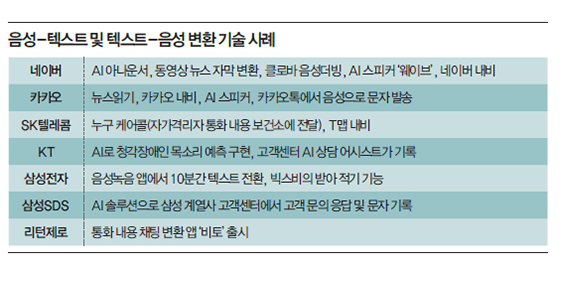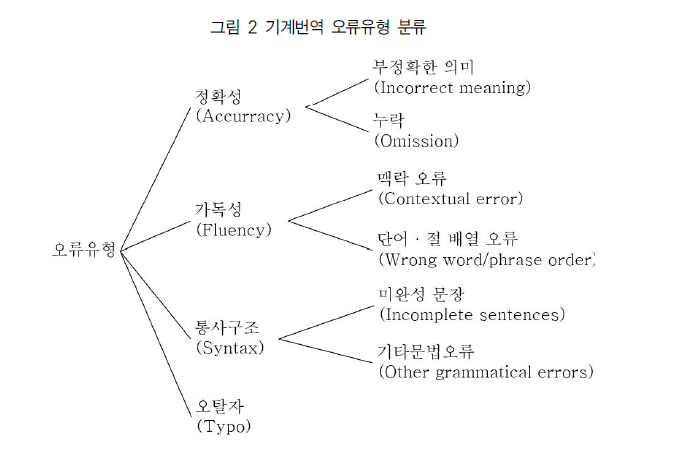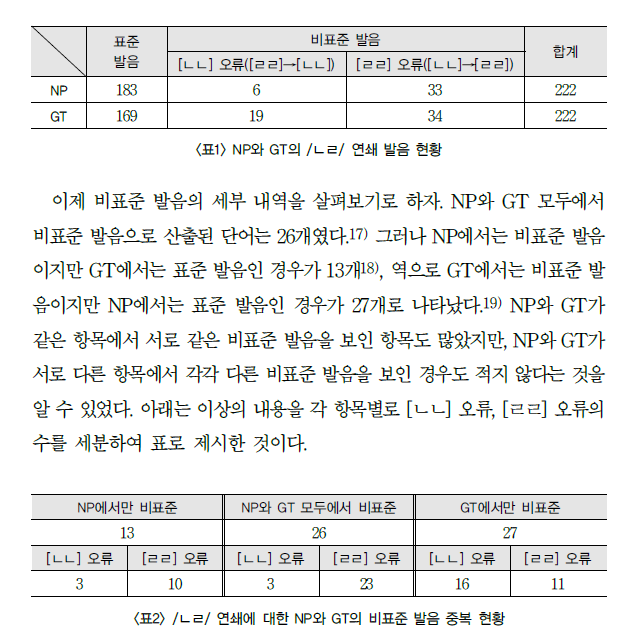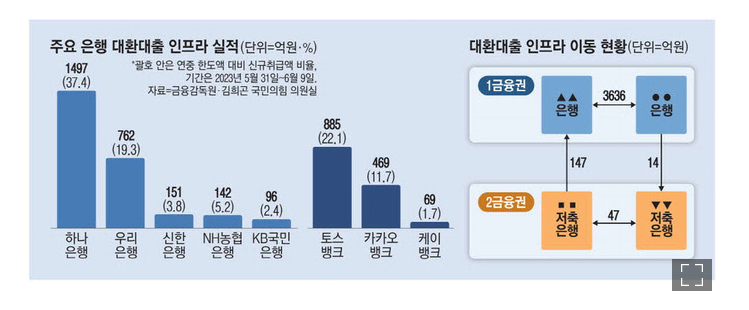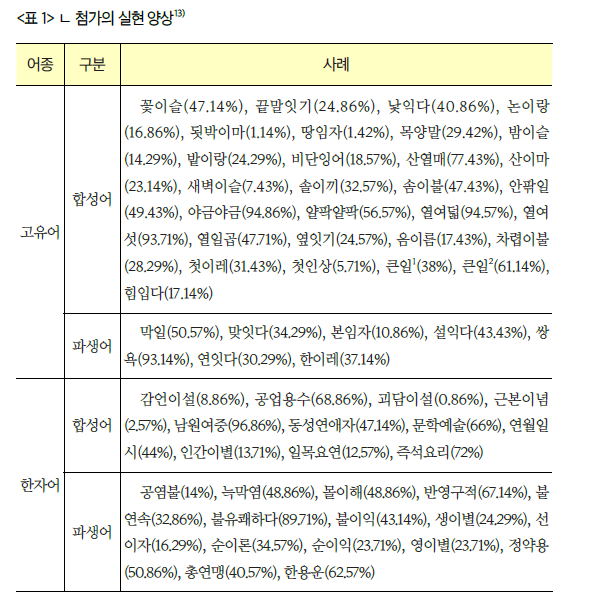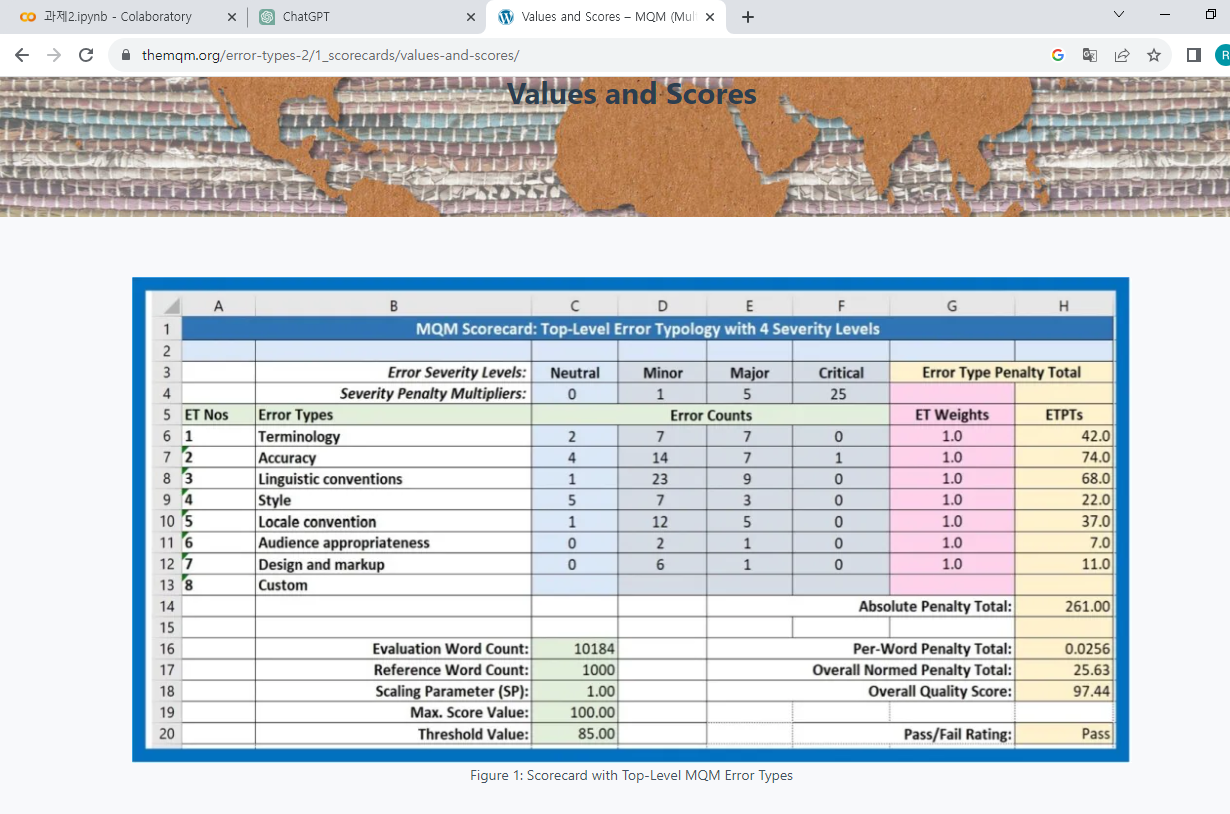